In [1]:
import pandas as pd
import matplotlib.pyplot as plt


games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

# games.head()
games.describe()
# games.info()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [14]:
# zjdź kolumny w których są braki w wartościach

games.is().any()
games.is().sum()
# games.is().sum().plot(kind = 'bar')

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
#zjdź tylko pełne wiersze

only_full_rows = games.drop().reset_index()
only_full_rows



In [ ]:
# games by platform

games_by_platform = games.groupby(['Platform'])['me'].count().to_frame(me='games_created').reset_index()
games_by_platform =games_by_platform.sort_values('games_created', ascending = False).reset_index(drop = True)
games_by_platform

# games_by_platform.plot(kind='bar',x = 'Platform', rot = 45)

In [ ]:
# ilosc gier dla jednej platformy per rok

# games_pl_y[games_pl_y['Platform']=='NES'].plot(kind='line',x='Year_of_Release',y='games_released',title='Games released on NES by year')


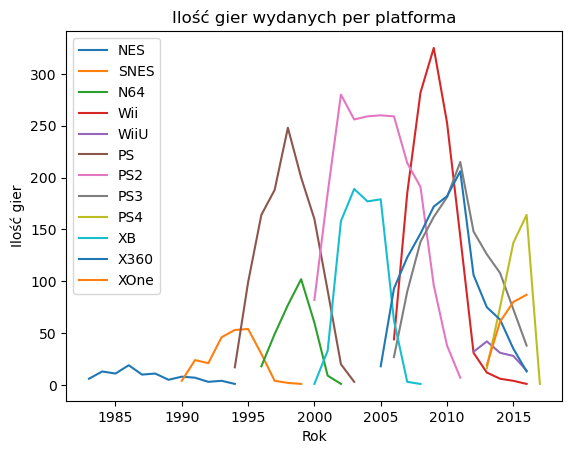

In [11]:
# ilośc gier  platformy per rok + wizualizacja (dla NES,SNES,N64,WII,WIIU, PSX, PS2, PS3,PS4 Xbox, Xbox360,Xone)

platforms_filter = ('NES','SNES','N64','Wii','WiiU','PS','PS2','PS3','PS4','XB','X360','XOne') 

games_pl_y = games[games['Platform'].isin(platforms_filter)].groupby(['Platform','Year_of_Release'])['me'].count().to_frame(me='games_released').reset_index()


# platforms = games_pl_y['Platform'].drop_duplicates().to_list()

for platform in platforms_filter:
    years_games = games_pl_y[games_pl_y['Platform']==platform]
    plt.plot(years_games['Year_of_Release'],years_games['games_released'],label= platform)

plt.title('Ilość gier wydanych per platforma')
plt.xlabel('Rok')
plt.ylabel('Ilość gier')
plt.legend()

# plt.show()

In [2]:
# średnia i media oce gry krytyków i użytkowników per platforma

import numpy as np

games.info()
games['User_Score'] = pd.to_numeric(games['User_Score'], errors='coerce')
games.info()

if games['User_Score'].mean() < 11:
    games['User_Score'] = games['User_Score']*10



scores = games.groupby('Platform', as_index = True).agg({'Critic_Score' : ['mean','median'], 'User_Score' : ['mean','median']})


scores_not_ = scores.drop()


warunki = [
    (scores_not_['Critic_Score','mean'] > scores_not_['User_Score','mean']),
    (scores_not_['User_Score','mean'] > scores_not_['Critic_Score','mean']),
    (scores_not_['User_Score','mean'] == scores_not_['Critic_Score','mean'])
]

wartosci = ['Krytycy','Gracze','Tak samo']

scores_not_['Lepiej ocenili'] = np.select(warunki,wartosci)


scores_not_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
<class 'pan

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [88]:
# gry które wyszły  więcej niż jedną platformę

platforms_q = games.groupby('me')['Platform'].count()
platforms_q = platforms_q[platforms_q.values > 1]
platforms_q.index

multiplatform_games = games[games['me'].isin(platforms_q.index)].sort_values('me').reset_index(drop=True)
multiplatform_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN,NaN,NaN
1,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN
2,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43,NaN,NaN,NaN,NaN,NaN,NaN
3,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,75.0,26.0,Treyarch,T
4,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,66.0,47.0,Treyarch,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,pro evolution soccer 2011,PS3,2010.0,Sports,Konami Digital Entertainment,0.29,1.17,0.54,0.41,2.41,77.0,40.0,68.0,85.0,Konami,E
7957,pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.79,74.0,10.0,58.0,5.0,Konami,E
7958,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.07,0.10,0.03,0.02,0.22,78.0,9.0,54.0,7.0,Konami,E
7959,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.06,0.09,0.00,0.02,0.17,NaN,NaN,NaN,NaN,THQ,E


In [4]:
# ilość gier  wydawcę i total sprzedaż global + średnia oce krytyków i użytkowników

# # bez n
# nn_publisher = games[games['Publisher'].not()].reset_index(drop = True)

games['User_Score'] = pd.to_numeric(games['User_Score'], errors='coerce')
games.info()

if games['User_Score'].mean() < 11:
    games['User_Score'] = games['User_Score']*10

# z n
nn_publisher = games

nn_publisher = nn_publisher.groupby('Publisher',as_index = 'True').agg({'me':'count','Global_Sales':'sum','Critic_Score':'mean','User_Score':'mean'})
nn_publisher = nn_publisher.reme(columns = {'me':'Games_released', 'Critic_Score':'Avg_Critic_Score', 'User_Score':'Avg_User_Score'})

nn_publisher.reset_index()


# nn_publisher.plot(kind = 'bar')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


,Publisher,Games_released,Global_Sales,Avg_Critic_Score,Avg_User_Score
0,10TACLE Studios,3,0.11,42.000000,70.000000
1,1C Company,3,0.10,73.000000,77.333333
2,20th Century Fox Video Games,5,1.94,NaN,NaN
3,2D Boy,1,0.04,90.000000,85.000000
4,3DO,36,10.12,57.470588,57.600000
...,...,...,...,...,...
576,id Software,1,0.03,85.000000,82.000000
577,imageepoch Inc.,2,0.04,NaN,NaN
578,inXile Entertainment,1,0.10,81.000000,73.000000
579,"mixi, Inc",1,0.87,NaN,NaN


In [6]:
# dla każdego wydawcy osobno przygotuj zestawienie - ile wyprodukował gier per rok / platforma z info jaka była ich łącz sprzedaż
# osobny plik csv/xls zapisz do folderu wydawcy_
games


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Najwyżej oceniane zarówno przez krytyków jak i graczy'}, xlabel='Publisher'>

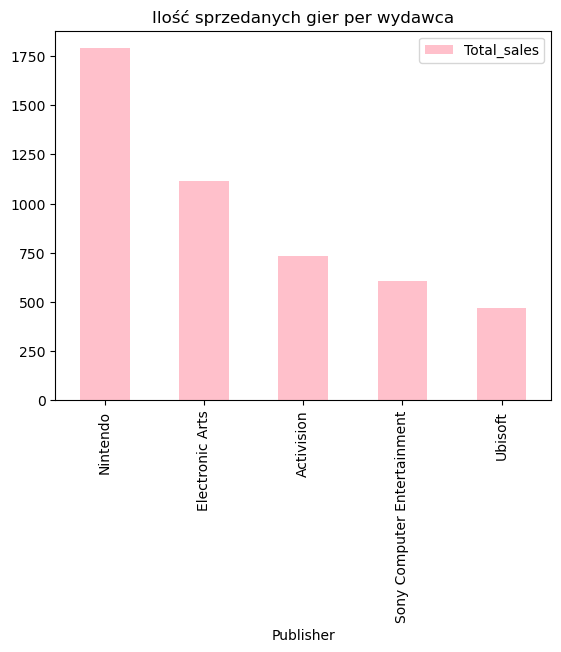

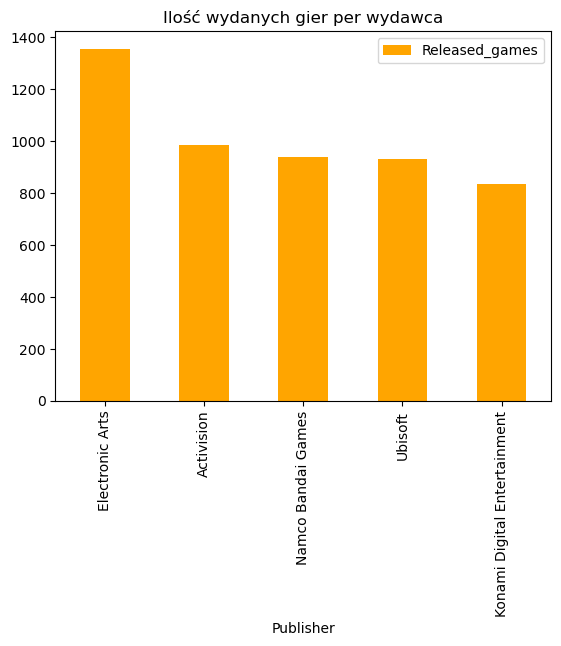

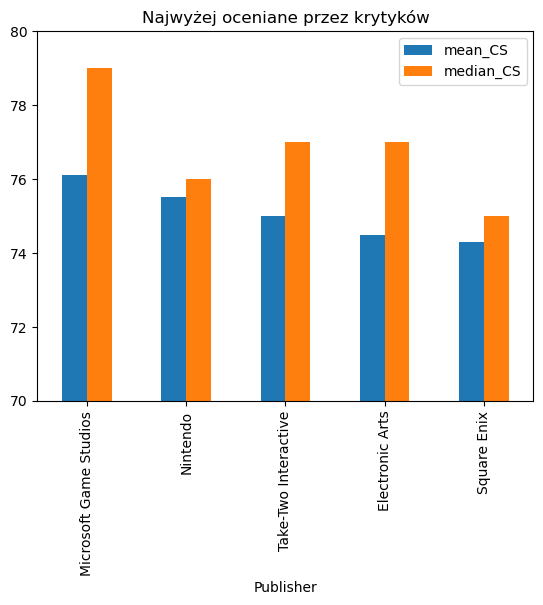

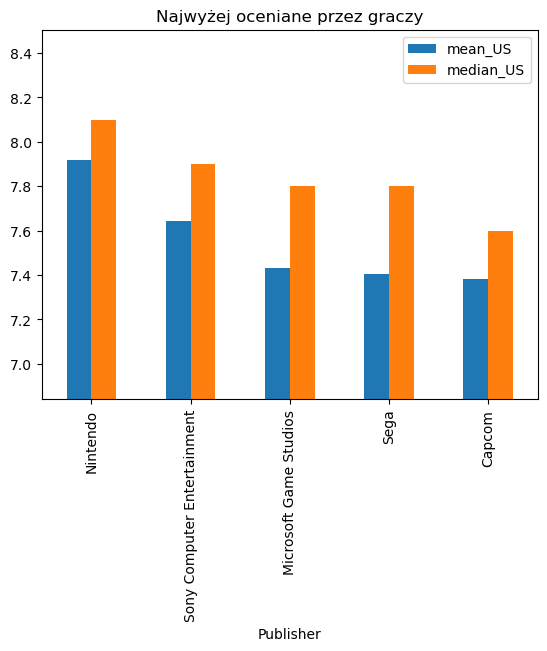

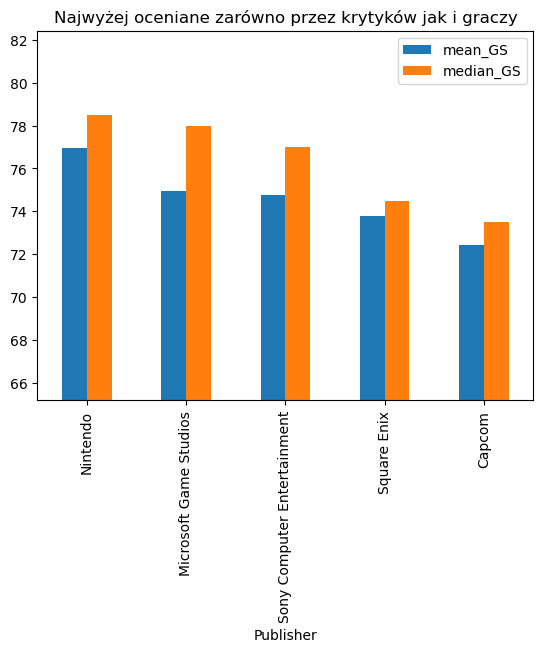

In [43]:
# top 5 wydawców per ilość sprzedanych kopii, per ilość wydanych gier, per średnia oce krytyków, per średnia oce użytkowników
# per średnia oce (krytycy + uzytkownicy)/2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

games = pd.read_csv('C:\\Users\\kacpe\\python_my_repo\\my_note\\Video_Games_Sales_as_at_22_Dec_2016.csv')

games.head()


by_sales = games.groupby('Publisher')['Global_Sales'].sum().to_frame(me='Total_sales')#.reset_index()
by_sales = by_sales.sort_values(by = 'Total_sales', ascending = False).head(5)#.reset_index()

# by_sales.info()

by_sales.plot( kind = 'bar', title = 'Ilość sprzedanych gier per wydawca', color = 'pink', rot = 90)


by_releases = games.groupby('Publisher')['me'].count().to_frame(me='Released_games')
by_releases = by_releases.sort_values(by = 'Released_games', ascending = False).head(5)

by_releases.plot(kind = 'bar', title = 'Ilość wydanych gier per wydawca', color = 'Orange', rot = 90)


by_critic = games.groupby('Publisher').agg(mean_CS = ('Critic_Score','mean'), median_CS = ('Critic_Score','median'),count_CS = ('Critic_Count','sum'))
# do sprawiedliwej oceny bierzemy studia, których gry były ocenione min 10% razy tego ile razy było jczęściej oceniane studio


by_critic =  by_critic[by_critic['count_CS'] > by_critic['count_CS'].max()/10].sort_values(['mean_CS','median_CS'], ascending = False).head(5).reset_index()
# # by_critic.sort_values('Critic_Score', ascending = False).head(5)
by_critic.plot( x = 'Publisher'
               , y = ['mean_CS','median_CS']
               , ylim = (70,80)
               , kind = 'bar'
               ,title = 'jwyżej oceniane przez krytyków')


games['User_Score'] = pd.to_numeric(games['User_Score'],errors='coerce')
by_user = games.groupby('Publisher').agg(mean_US = ('User_Score','mean'), median_US = ('User_Score','median'), count_US = ('User_Count','sum'))

by_user = by_user[by_user['count_US'] > by_user['count_US'].max()/10].sort_values(['mean_US','median_US'], ascending = False).head(5).reset_index()
by_user.plot(x = 'Publisher'
             , y = ['mean_US', 'median_US']
             , kind = 'bar'
             ,ylim = (by_user['median_US'].min() * 0.9, by_user['median_US'].max() * 1.05)
             ,title = 'jwyżej oceniane przez graczy'
            )






general_score = games
general_score['User_Score'] = general_score['User_Score'] * 10
general_score['general_score'] = general_score[['Critic_Score','User_Score']].mean(axis = 1)
general_score['all_reviews'] = general_score[['Critic_Count','User_Count']].sum(axis = 1)
general_score = general_score.groupby('Publisher').agg(mean_GS = ('general_score','mean'), median_GS = ('general_score','median'), count_GS = ('all_reviews','sum'))


general_score = general_score[general_score['count_GS'] > general_score['count_GS'].max()/10].sort_values(['mean_GS','median_GS'],ascending = False).head(5).reset_index()

general_score.plot(x = 'Publisher'
                   , y = ['mean_GS','median_GS']
                   , kind = 'bar'
                   , title = 'jwyżej oceniane zarówno przez krytyków jak i graczy'
                   , ylim = (general_score['mean_GS'].min() * 0.9 ,general_score['median_GS'].max() * 1.05)
                  )





['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


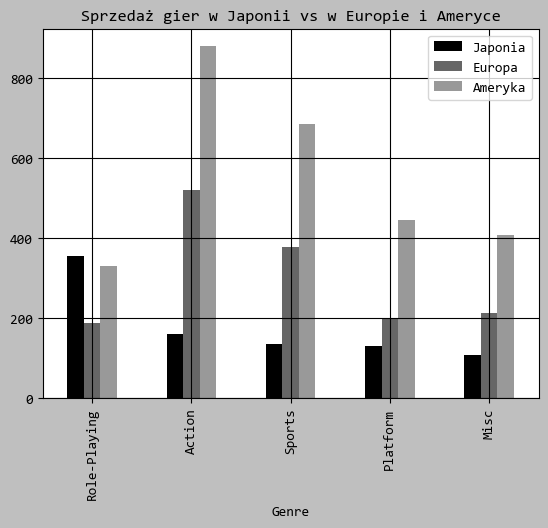

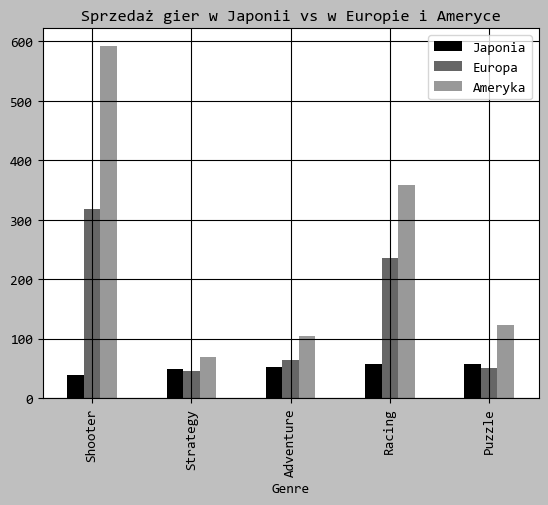

In [17]:
# top 5 i last 5 gatunków gier pod względem sprzedaży per region na 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('grayscale')
print(plt.style.available)
plt.rcParams["font.family"] = "consolas"

games = pd.read_csv('C:\\Users\\kacpe\\python_my_repo\\my_note\\Video_Games_Sales_as_at_22_Dec_2016.csv')



genres_sales = games[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
genres_sales = genres_sales.groupby('Genre').agg(NA_sum=('NA_Sales','sum'),EU_sum=('EU_Sales','sum'),JP_sum=('JP_Sales','sum'))

# #######

# NA_top = genres_sales[['NA_sum','EU_sum','JP_sum']].sort_values('NA_sum',ascending = False).reset_index().head(5)
# wykres_top_NA = NA_top.plot(x = 'Genre'
#                     , y = ['NA_sum','EU_sum','JP_sum']
#                     , color = ['#507f91','#79b370','#9c87a3']
#                     , xlabel = 'gatunki gier'
#                     , ylabel = 'miliony sprzedanych kopii'
#                     , kind = 'bar'
#                     , title = 'Najlepiej sprzedające się gatunki w Ameryce północnej na tle sprzedaży tych samych gatunków w Europie i Japonii\n\n')
# wykres_top_NA.legend(['Ameryka Północna','Europa','Japonia'])
# wykres_top_NA.grid('on')#,which = 'major', axis = 'x')

# #######

# NA_last = genres_sales[['NA_sum','EU_sum','JP_sum']].sort_values('NA_sum', ascending = True).reset_index().head(5)
# wykres_last_NA = NA_last.plot(x = 'Genre'
#                     , y = ['NA_sum','EU_sum','JP_sum']
#                     , color = ['#507f91','#79b370','#9c87a3']
#                     , xlabel = 'gatunki gier'
#                     , ylabel = 'miliony sprzedanych kopii'
#                     , kind = 'bar'
#                     , title = 'Najgorzej sprzedające się gatunki w Ameryce północnej na tle sprzedaży tych samych gatunków w Europie i Japonii\n\n')
# wykres_last_NA.legend(['Ameryka Północna','Europa','Japonia'],loc = 0)
# wykres_last_NA.grid('on')#,which = 'major', axis = 'x')

# #######

# EU_top = genres_sales[['EU_sum','NA_sum','JP_sum']].sort_values('EU_sum',ascending = False).reset_index().head(5)
# wykres_top_EU = EU_top.plot(x = 'Genre'
#                     , y = ['EU_sum','NA_sum','JP_sum']
#                     , color = ['#79b370','#507f91','#9c87a3']
#                     , xlabel = 'gatunki gier'
#                     , ylabel = 'miliony sprzedanych kopii'
#                     , kind = 'bar'
#                     , title = 'Najlepiej sprzedające się gatunki w Europie na tle sprzedaży tych samych gatunków w Ameryce i Japonii\n\n')
# wykres_top_EU.legend(['Europa','Ameryka','Japonia'])
# wykres_top_EU.grid('on')#,which = 'major', axis = 'x')

# #######

# EU_last = genres_sales[['EU_sum','NA_sum','JP_sum']].sort_values('EU_sum',ascending = True).reset_index().head(5)
# wykres_last_EU = EU_last.plot(x = 'Genre'
#                     , y = ['EU_sum','NA_sum','JP_sum']
#                     , color = ['#79b370','#507f91','#9c87a3']
#                     , xlabel = 'gatunki gier'
#                     , ylabel = 'miliony sprzedanych kopii'
#                     , kind = 'bar'
#                     , title = 'Najgorzej sprzedające się gatunki w Europie na tle sprzedaży tych samych gatunków w Ameryce i Japonii\n\n')
# wykres_last_EU.legend(['Europa','Ameryka','Japonia'])
# wykres_last_EU.grid('on')#,which = 'major', axis = 'x')




JP_top = genres_sales[['JP_sum','EU_sum','NA_sum']]
JP_top = JP_top.sort_values('JP_sum', ascending = False).reset_index().head(5)

wykres_JP_top = JP_top.plot(
                             x = 'Genre'
                            ,y = ['JP_sum','EU_sum','NA_sum']
                            ,kind = 'bar'
                            ,title = 'Sprzedaż gier w Japonii vs w Europie i Ameryce'
                            )
wykres_JP_top.grid('on')
wykres_JP_top.legend(['Japonia','Europa','Ameryka'])


JP_last = genres_sales.sort_values('JP_sum', ascending = True).reset_index().head(5)

wykres_JP_last = JP_last.plot(
                             x = 'Genre'
                            ,y = ['JP_sum','EU_sum','NA_sum']
                            ,kind = 'bar'
                            ,title = 'Sprzedaż gier w Japonii vs w Europie i Ameryce'
                            )
wykres_JP_last.grid('on')
wykres_JP_last.legend(['Japonia','Europa','Ameryka'])



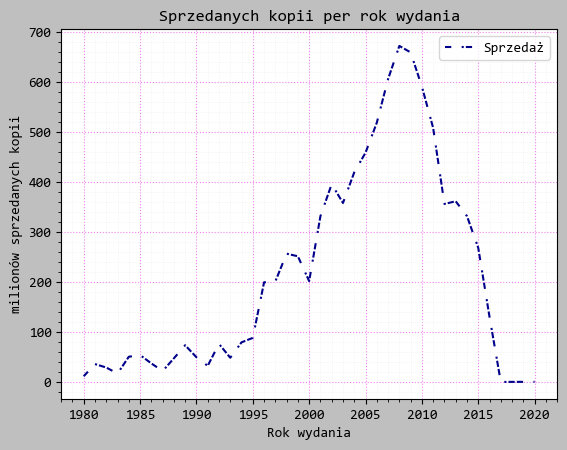

In [79]:
# top 5 i last 5 lat pod względem sprzedaży


# games.isna().any()

sales_by_yr = games.groupby('Year_of_Release').agg(Total_sales = ('Global_Sales','sum')).reset_index()

wykres_sales_by_yr = sales_by_yr.plot(
                                         x = 'Year_of_Release'
                                        ,y = 'Total_sales'
                                        ,kind = 'line'
                                        ,xlabel = 'Rok wydania'
                                        ,ylabel = 'milionów sprzedanych kopii'
                                        ,title = 'Sprzedanych kopii per rok wydania'
                                        ,linestyle = (0, (3, 5, 1, 1, 3, 1))
                                        ,color = 'darkblue'
                                         )

wykres_sales_by_yr.legend(['Sprzedaż'])
# wykres_sales_by_yr.grid(which='major', color='#DDDDDD', linewidth=0.8)
wykres_sales_by_yr.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
wykres_sales_by_yr.grid('on',color = 'violet', linestyle = 'dotted')
wykres_sales_by_yr.minorticks_on()


# ax = sinplot()
# # Show the major grid and style it slightly.
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# # Show the minor grid as well. Style it in very light gray as a thin,
# # dotted line.
# ax.grid(which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
# # Make the minor ticks and gridlines show.
# ax.minorticks_on()
